<a href="https://colab.research.google.com/github/gopalm-ai/Manning_Live_Project-Introduction-to-Braket-API/blob/main/Full_Oracle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install amazon-braket-sdk==1.7.1
!pip3 install amazon-braket-default-simulator==1.2.1
!pip3 install amazon-braket-schemas==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports and Local Simulator

In [ ]:
import braket._sdk as braket_sdk
braket_sdk.__version__

'1.7.1'

In [ ]:
from braket.devices import LocalSimulator
device = LocalSimulator()

In [ ]:
device

In [ ]:
import boto3
from braket.circuits import Circuit, Gate, Observable
from braket.aws import AwsDevice
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA 
# The linear algebra library in NumPy
import functools

# Constant Oracle

In [ ]:
# Set length of n-bit input string
n_qubits = 3

In [ ]:
def get_constant():
  c_oracle_circ = Circuit()
  output = np.random.randint(2)
  for qubit in range(n_qubits+1):
    if output == 1:
      c_oracle_circ.x(qubit)
    else:
      c_oracle_circ.i(qubit)
  return c_oracle_circ

In [ ]:
constant_oracle = get_constant()
print(constant_oracle)

T  : |0|
        
q0 : -X-
        
q1 : -X-
        
q2 : -X-
        
q3 : -X-

T  : |0|


# Balanced Oracle

In [ ]:
def get_balanced():
  b_oracle_circ = Circuit()
  for qubit in range(n_qubits+1):
    b_oracle_circ.cnot(qubit, n_qubits+1)
  return b_oracle_circ

In [ ]:
balanced_oracle = get_balanced()
print(balanced_oracle)

T  : |0|1|2|
            
q0 : -C-----
      |     
q1 : -|-C---
      | |   
q2 : -|-|-C-
      | | | 
q3 : -X-X-X-

T  : |0|1|2|


# Full Oracle

In [ ]:
full_oracle = Circuit().x(n_qubits)
for qubit in range(n_qubits+1):
  full_oracle.h(qubit)
print(full_oracle)

T  : |0|1|
          
q0 : -H---
          
q1 : -H---
          
q2 : -H---
          
q3 : -X-H-

T  : |0|1|


In [ ]:
full_oracle.add(constant_oracle)
full_oracle.add(balanced_oracle)
full_oracle.add(constant_oracle)
for qubit in range(n_qubits):
  full_oracle.h(qubit)

print(full_oracle)

T  : |0|1|2|3|4|5|6|7|
                      
q0 : -H-X---C-X-H-----
            |         
q1 : -H-X---|-C-X-H---
            | |       
q2 : -H-X---|-|-C-X-H-
            | | |     
q3 : -X-H-X-X-X-X-X---

T  : |0|1|2|3|4|5|6|7|


# Run Simulation and Plot Results

In [ ]:
from matplotlib import pyplot as plt

Counter({'1111': 508, '1110': 492})
{'1111': 0.508, '1110': 0.492}


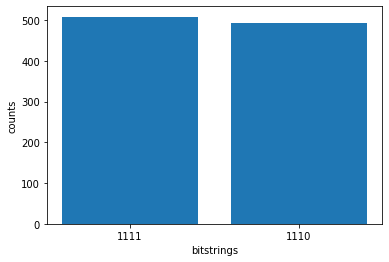

In [ ]:
run = device.run(full_oracle, shots=1000)
result = run.result() 
print(result.measurement_counts)
print(result.measurement_probabilities)

plt.bar(result.measurement_counts.keys(), result.measurement_counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');
